In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import numpy as np

In [ ]:

file_path = '.csv'
data = pd.read_csv(file_path)
data.head()


,set_number,Year,Pieces,Minifigs,retale_price,resale_price,Launch date,Exit date,Theme,years_in_retirement,total_price_increase,average_increase_per_year,percentage_increase_per_year,adjusted_value_new,total_price_increase_real,percentage_increase_per_year_real,average_increase_per_year_real,Subtheme
0,1817-1,1996,135.0,3.0,15.00,53.95,01/03/1996,2001-12-31,Town,21,38.95,1.854762,3.437928,35.594905,20.594905,1.817812,0.980710,Special
1,4559-1,1996,842.0,7.0,130.00,585.00,01/07/1996,1999-01-30,Trains,23,455.00,19.782609,3.381643,370.981212,240.981212,1.791016,10.477444,9V
2,4565-1,1996,914.0,3.0,140.00,547.04,01/09/1996,2002-12-31,Trains,20,407.04,20.352000,3.720386,368.142238,228.142238,2.085243,11.407112,9V
3,6024-1,1996,59.0,2.0,6.50,132.69,01/06/1996,1998-12-31,Castle,24,126.19,5.257917,3.962557,82.496224,75.996224,2.386396,3.166509,Dark Forest
4,6135-1,1996,57.0,1.0,8.75,20.00,01/01/1996,1997-12-31,Aquazone,25,11.25,0.450000,2.250000,12.190617,3.440617,0.688123,0.137625,Aquasharks


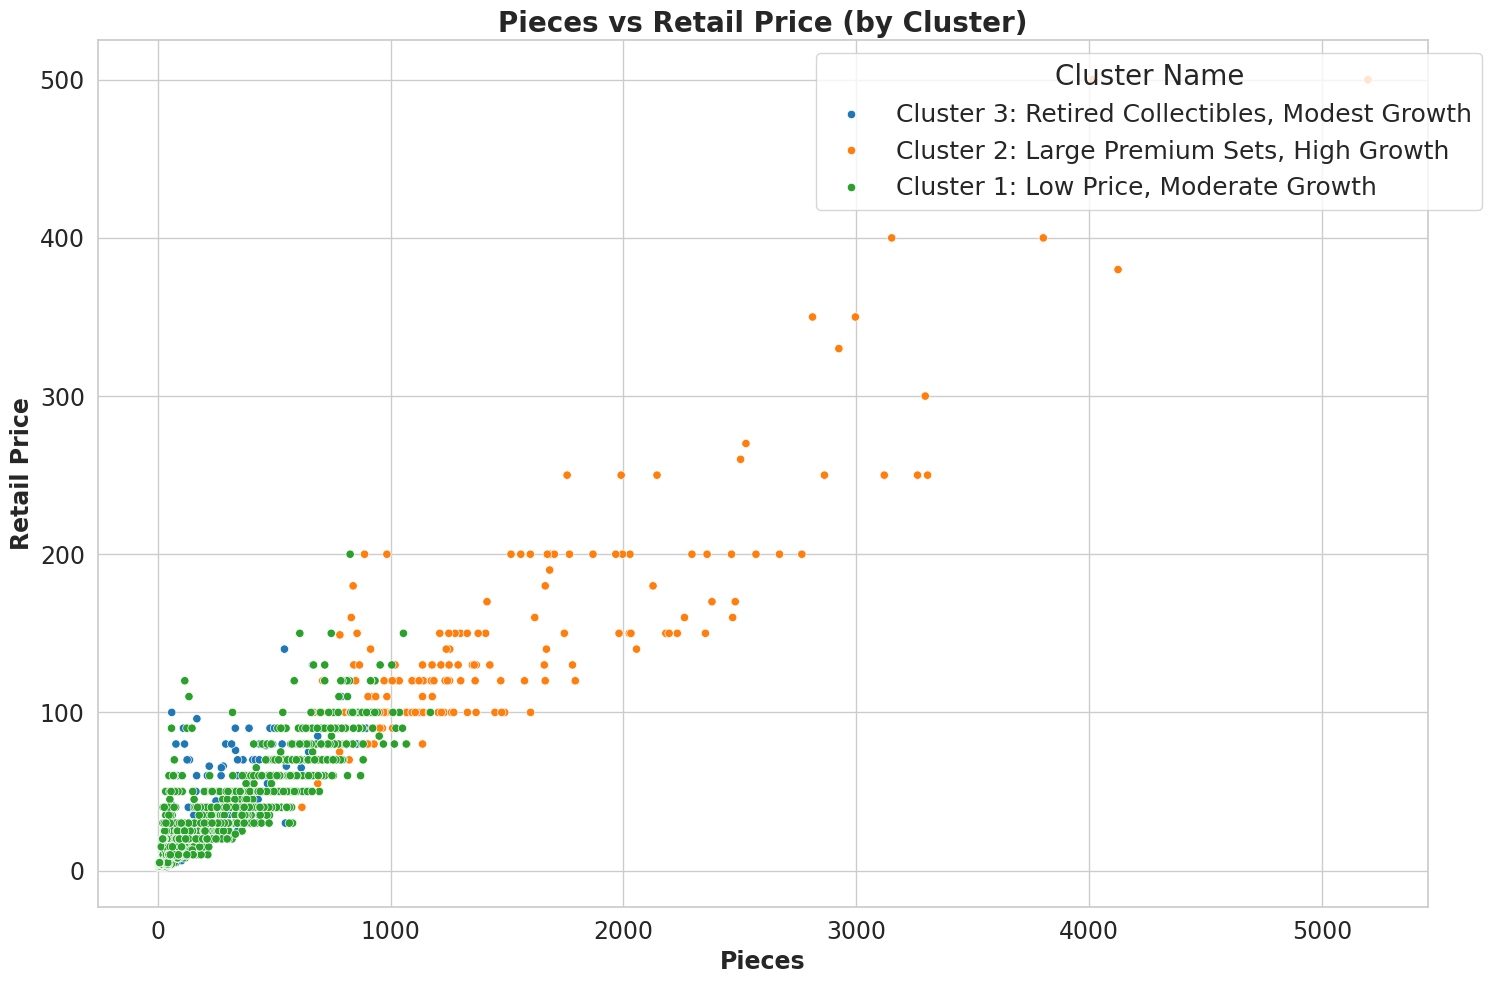

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


encoder = OneHotEncoder()
theme_encoded = encoder.fit_transform(data[['Theme']]).toarray()


theme_encoded_df = pd.DataFrame(theme_encoded, columns=encoder.get_feature_names_out(['Theme']))


numeric_features = ['percentage_increase_per_year', 'resale_price', 'Pieces', 'years_in_retirement']


scaler = StandardScaler()
scaled_numeric_features = scaler.fit_transform(data[numeric_features])
combined_features = pd.concat([pd.DataFrame(scaled_numeric_features, columns=numeric_features), theme_encoded_df], axis=1)


kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(combined_features)

cluster_names = {
    0: 'Cluster 1: Low Price, Moderate Growth',
    1: 'Cluster 2: Large Premium Sets, High Growth',
    2: 'Cluster 3: Retired Collectibles, Modest Growth'
}


data['Cluster Name'] = data['Cluster'].map(cluster_names)

plt.figure(figsize=(15, 10))
scatter_plot = sns.scatterplot(data=data, x='Pieces', y='retale_price', hue='Cluster Name', palette='tab10')


plt.title('Pieces vs Retail Price (by Cluster)', fontsize=20, fontweight='bold')
plt.ylabel('Retail Price', fontsize=17, fontweight='bold')
plt.xlabel('Pieces', fontsize=17, fontweight='bold')


for label in plt.gca().get_xticklabels():
    label.set_fontsize(17)
for label in plt.gca().get_yticklabels():
    label.set_fontsize(17)


plt.legend(title='Cluster Name', title_fontsize='20', fontsize='18', bbox_to_anchor=(1.05, 1), loc='upper right')


plt.tight_layout()
plt.show()


In [ ]:
theme_cluster_distribution = data.groupby(['Cluster Name', 'Theme']).size().reset_index(name='Count')

majority_themes = theme_cluster_distribution.loc[theme_cluster_distribution.groupby('Cluster Name')['Count'].idxmax()]

for index, row in majority_themes.iterrows():
    print(f"Cluster Name {row['Cluster Name']}: Majority Theme is '{row['Theme']}' with {row['Count']} sets")


Cluster Name Cluster 1: Low Price, Moderate Growth: Majority Theme is 'Collectable Minifigures' with 470 sets
Cluster Name Cluster 2: Large Premium Sets, High Growth: Majority Theme is 'Star Wars' with 66 sets
Cluster Name Cluster 3: Retired Collectibles, Modest Growth: Majority Theme is 'Town' with 106 sets


<Figure size 2000x500 with 0 Axes>

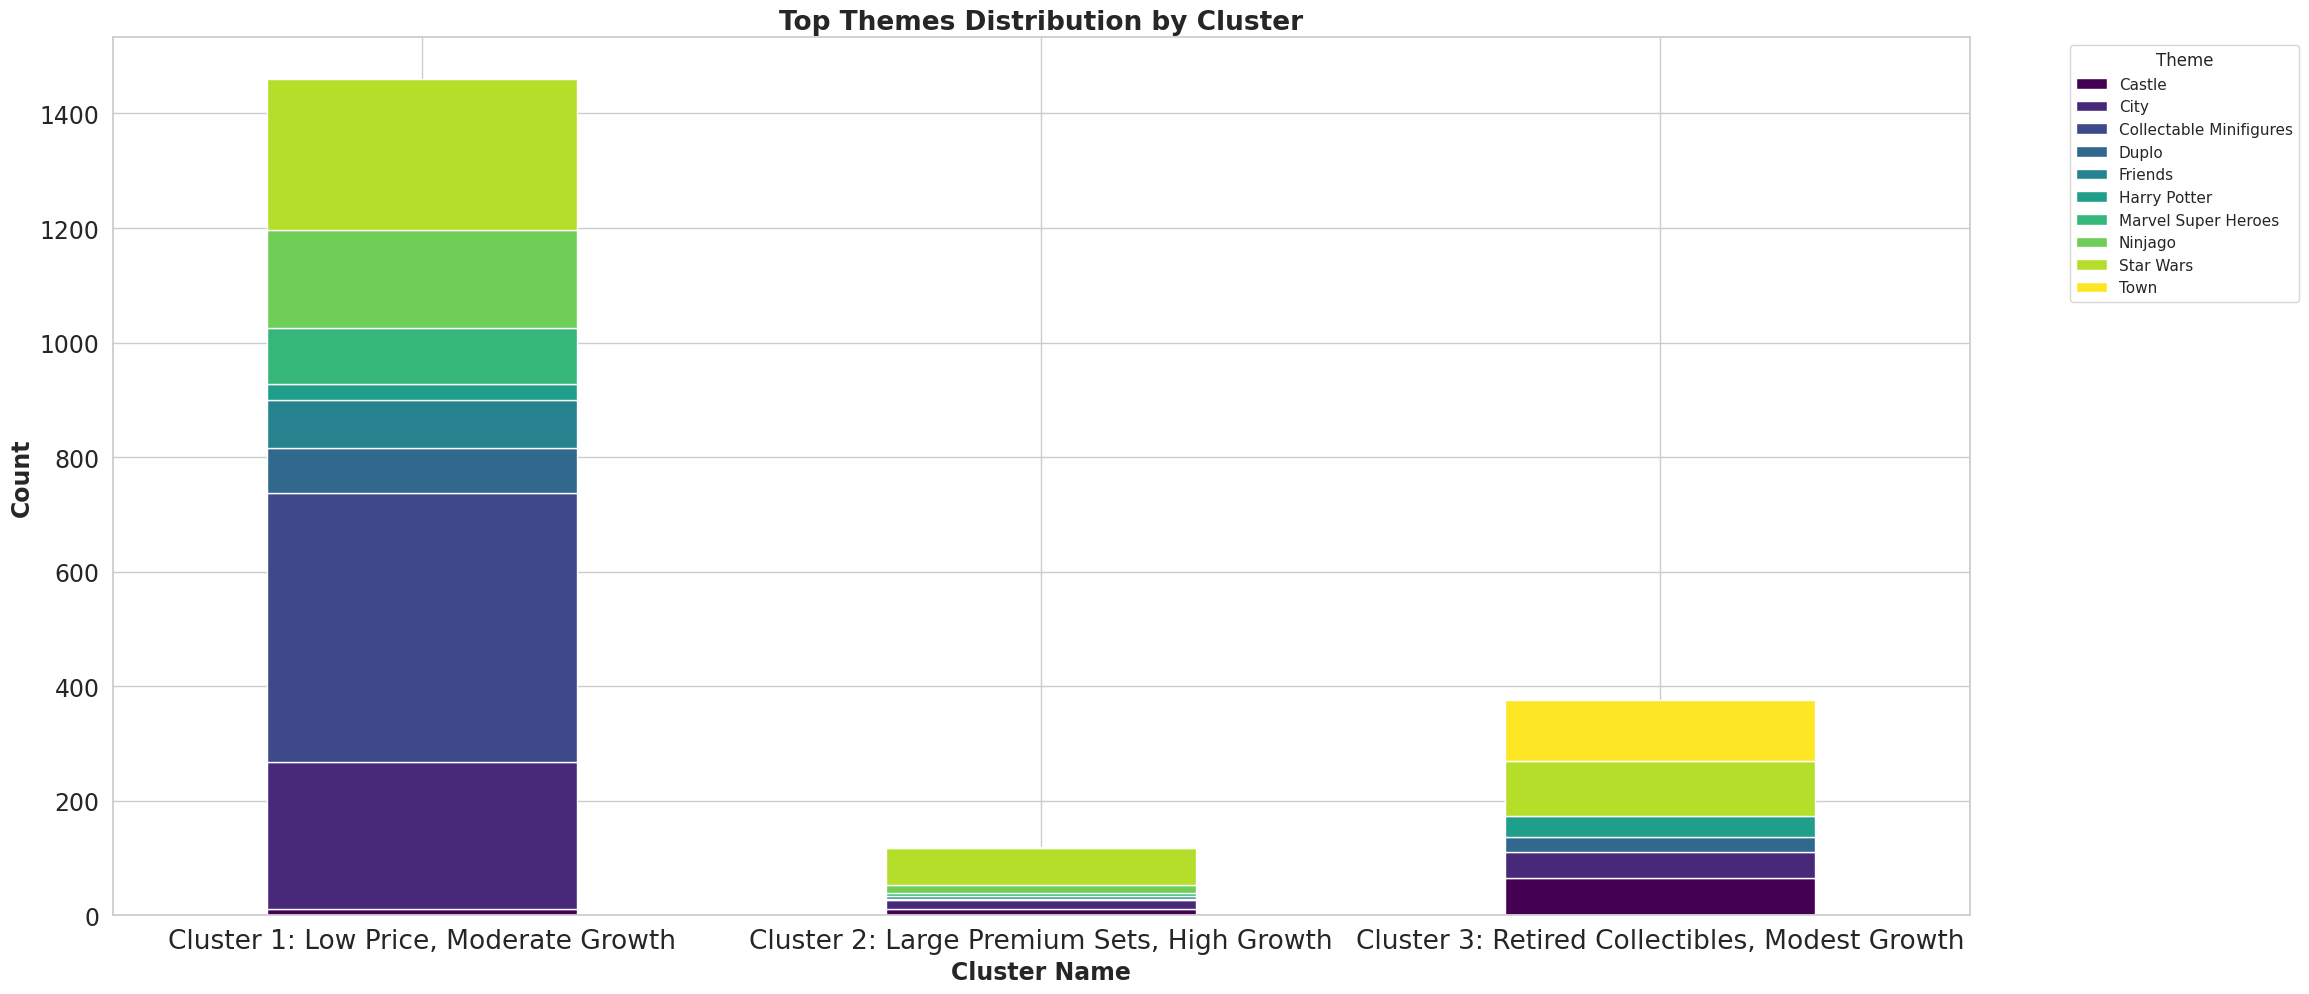

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

theme_counts = data.groupby(['Cluster Name', 'Theme']).size().reset_index(name='Count')

threshold = 5
significant_themes = theme_counts[theme_counts['Count'] >= threshold]


top_n = 10  # How many themes you want
top_themes = theme_counts.groupby('Theme')['Count'].sum().nlargest(top_n).index

filtered_theme_counts = theme_counts[theme_counts['Theme'].isin(top_themes)]


stacked_data = filtered_theme_counts.pivot_table(index='Cluster Name', columns='Theme', values='Count', fill_value=0)


plt.figure(figsize=(20, 5))
stacked_data.plot(kind='bar', stacked=True, colormap='viridis', figsize=(23, 10))
plt.title('Top Themes Distribution by Cluster', fontsize=19, fontweight='bold')
plt.xlabel('Cluster Name', fontsize=17, fontweight='bold')
plt.ylabel('Count', fontsize=17, fontweight='bold')
plt.legend(title='Theme', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
for label in plt.gca().get_xticklabels():
    label.set_fontsize(19)
for label in plt.gca().get_yticklabels():
    label.set_fontsize(17)
plt.show()



<ipython-input-102-9291485d1d26>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Cluster Name', y='percentage_increase_per_year', data=average_growth_by_cluster,


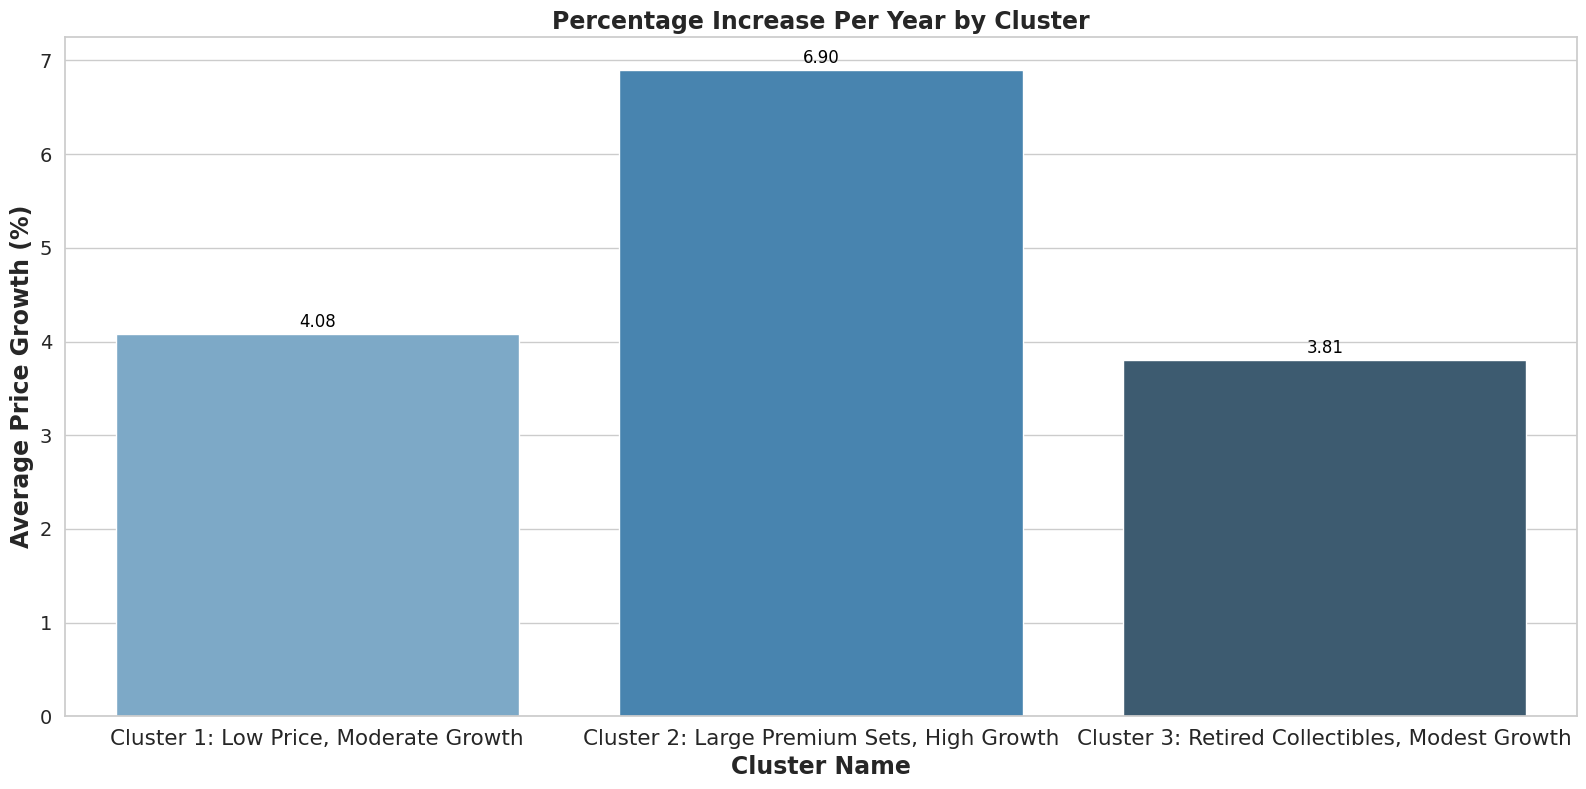

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


average_growth_by_cluster = data.groupby('Cluster Name')['percentage_increase_per_year'].mean().reset_index()


desired_order = ['Cluster 1: Low Price, Moderate Growth',
                 'Cluster 2: Large Premium Sets, High Growth',
                 'Cluster 3: Retired Collectibles, Modest Growth']


sns.set(style="whitegrid")


plt.figure(figsize=(16, 8))
bar_plot = sns.barplot(x='Cluster Name', y='percentage_increase_per_year', data=average_growth_by_cluster,
                       palette='Blues_d', order=desired_order)


for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.2f}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='baseline',
                      color='black',
                      fontsize=12,
                      xytext=(0, 5),
                      textcoords='offset points')


plt.title('Percentage Increase Per Year by Cluster', fontsize=17, fontweight='bold')
plt.xlabel('Cluster Name', fontsize=17, fontweight='bold')
plt.ylabel('Average Price Growth (%)', fontsize=17, fontweight='bold')
plt.xticks(rotation=0)
plt.tight_layout()
for label in plt.gca().get_xticklabels():
    label.set_fontsize(15.5)
for label in plt.gca().get_yticklabels():
    label.set_fontsize(14)


plt.show()


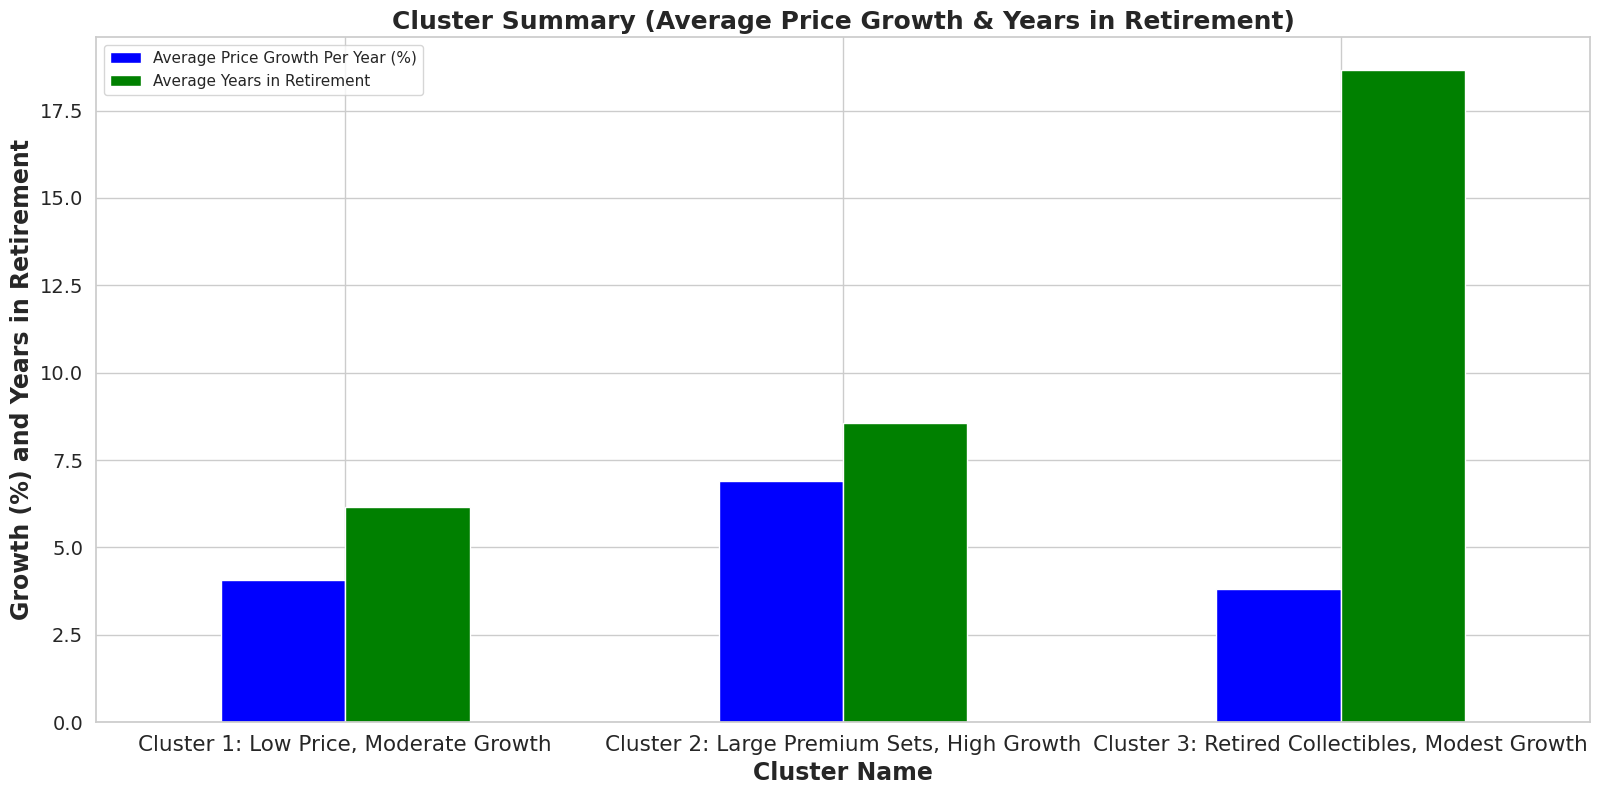

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt


cluster_stats = data.groupby('Cluster Name').agg({
    'percentage_increase_per_year': 'mean',
    'years_in_retirement': 'mean'
}).reset_index()


cluster_stats = cluster_stats.rename(columns={
    'percentage_increase_per_year': 'Average Price Growth Per Year (%)',
    'years_in_retirement': 'Average Years in Retirement'
})


cluster_stats.plot(kind='bar', x='Cluster Name',
                   y=['Average Price Growth Per Year (%)', 'Average Years in Retirement'],
                   figsize=(16, 8), color=['blue', 'green'])

plt.title('Cluster Summary (Average Price Growth & Years in Retirement)', fontsize=18, fontweight='bold')
plt.xticks(rotation=0)
plt.xlabel('Cluster Name')
plt.ylabel('Growth (%) and Years in Retirement')
plt.tight_layout()
for label in plt.gca().get_xticklabels():
    label.set_fontsize(15.5)
plt.xlabel('Cluster Name', fontsize=17, fontweight='bold')
plt.ylabel('Growth (%) and Years in Retirement', fontsize=17, fontweight='bold')
for label in plt.gca().get_yticklabels():
    label.set_fontsize(14)


plt.show()




In [ ]:
from sklearn.metrics import silhouette_score


for n_clusters in range(2, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(combined_features)
    silhouette_avg = silhouette_score(combined_features, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters = 2, the silhouette score is 0.3847679658249581
For n_clusters = 3, the silhouette score is 0.259797157094882
For n_clusters = 4, the silhouette score is 0.2851877831481966
For n_clusters = 5, the silhouette score is 0.2699084552432337


In [ ]:
cluster_summary = data.groupby('Cluster Name').agg({
    'percentage_increase_per_year': ['mean', 'std'],
    'resale_price': ['mean', 'std'],
    'Pieces': ['mean', 'std'],
    'years_in_retirement': ['mean', 'std'],
    'retale_price': ['mean', 'std']
}).reset_index()

print(cluster_summary)

                                     Cluster Name  \
                                                    
0           Cluster 1: Low Price, Moderate Growth   
1      Cluster 2: Large Premium Sets, High Growth   
2  Cluster 3: Retired Collectibles, Modest Growth   

  percentage_increase_per_year           resale_price              \
                          mean       std         mean         std   
0                     4.080986  9.068868    43.738946   44.600741   
1                     6.901750  4.425606   412.161726  394.369112   
2                     3.807420  1.304380   109.232370  102.089077   

        Pieces             years_in_retirement           retale_price  \
          mean         std                mean       std         mean   
0   208.376364  226.108858            6.152824  3.057598    26.251348   
1  1401.817259  756.375276            8.553299  5.265739   140.341421   
2   207.673410  182.054890           18.663295  3.671880    27.959870   

              
       

In [ ]:
import pandas as pd


theme_growth = data.groupby('Theme')['percentage_increase_per_year'].mean().reset_index()

top_themes = theme_growth.sort_values(by='percentage_increase_per_year', ascending=False).head(10)


print(top_themes)



                    Theme  percentage_increase_per_year
43        Speed Champions                     13.413068
29         Jurassic World                     12.630171
32              Minecraft                     10.398030
26                  Ideas                      9.937399
13         Creator Expert                      9.085682
38            Promotional                      8.948496
22           Ghostbusters                      8.735330
33             Monkie Kid                      8.297054
51             The Hobbit                      8.292253
54  The Lord of the Rings                      8.026826


<ipython-input-86-191f7ee89fde>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_themes, x='percentage_increase_per_year', y='Theme', palette='viridis')


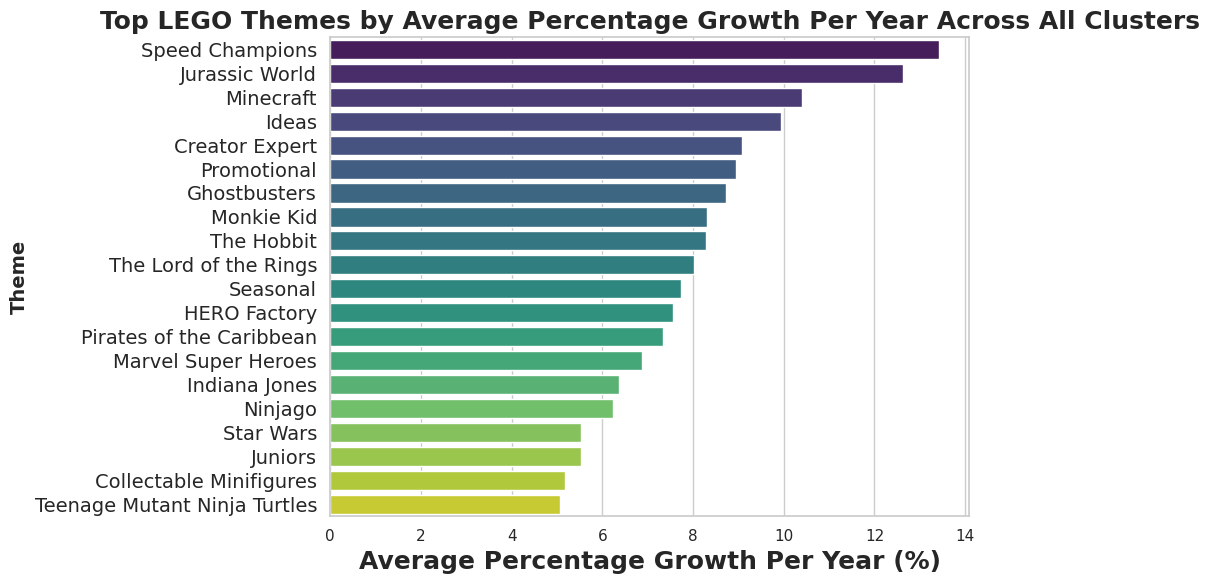

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


theme_growth = data.groupby('Theme')['percentage_increase_per_year'].mean().reset_index()
top_themes = theme_growth.sort_values(by='percentage_increase_per_year', ascending=False).head(20)
overall_average_growth = theme_growth['percentage_increase_per_year'].mean()


plt.figure(figsize=(10, 6))
sns.barplot(data=top_themes, x='percentage_increase_per_year', y='Theme', palette='viridis')
plt.title(f'Top LEGO Themes by Average Percentage Growth Per Year Across All Clusters', fontsize=18, fontweight='bold')
plt.xlabel('Average Percentage Growth Per Year (%)', fontsize=18, fontweight='bold')
plt.ylabel('Theme', fontsize=14, fontweight='bold')
for label in plt.gca().get_yticklabels():
    label.set_fontsize(14)
for label in plt.gca().get_yticklabels():
    label.set_fontsize(14)

plt.tight_layout()
plt.show()
